In [1]:
# this may take a few minutes..
%run prep.py

** Created LCL dataset in 0.00s **


In [ ]:
from prep import data_dir

import dask
import dask.dataframe as dd
from dask.distributed import Client

import pandas as pd

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:50987 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [7]:
client.close()

In [3]:
columns = [
    "lclid",
    "stdortou",
    "dt",
    "c",
    "acorn",
    "acorn_grouped"
]

ddf = dd.read_csv(
    data_dir / "low-carbon-london/*.csv",
    dtype={
#         "lclid": "string",
        "lclid": str,
        "stdortou": "category",
        "acorn": "category",
        "acorn_grouped": "category"
    },
    parse_dates=["dt"],
    names=columns,
    header=0
)

ddf.c = (
    ddf.c.map_partitions(pd.to_numeric, errors="coerce", downcast="float")
    .fillna(0)
)

In [5]:
ddf.to_parquet(
    data_dir / "lcl.snappy.parquet",
    compression="snappy",
    write_index=False,
)

In [7]:
ddf = dd.read_parquet(
    data_dir / "lcl.snappy.parquet",
)

In [ ]:
%%time
df = ddf.compute()

In [ ]:
df.shape[0]

In [7]:
df.dtypes

lclid                    string
stdortou               category
dt               datetime64[ns]
c                       float32
acorn                  category
acorn_grouped          category
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167932474 entries, 0 to 73085
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   lclid          string        
 1   stdortou       category      
 2   dt             datetime64[ns]
 3   c              float32       
 4   acorn          category      
 5   acorn_grouped  category      
dtypes: category(3), datetime64[ns](1), float32(1), string(1)
memory usage: 4.8 GB


In [35]:
df.iloc[:10000].set_index(["dt", "acorn"]).to_xarray()

ValueError: all arrays must be same length

In [23]:
client.close()

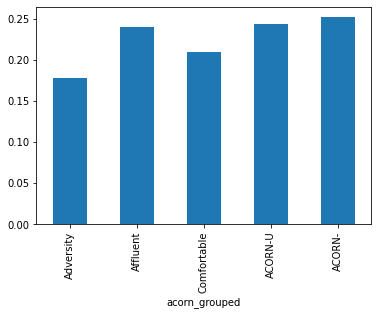

In [30]:
df.groupby("acorn_grouped").c.mean().plot(kind="bar")

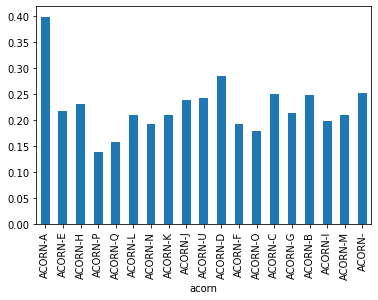

In [38]:
df.groupby("acorn").c.mean().plot(kind="bar")

In [32]:
df.acorn_grouped.value_counts()

Affluent       67359986
Adversity      54288852
Comfortable    44833553
ACORN-U         1412799
ACORN-            37284
Name: acorn_grouped, dtype: int64

In [33]:
aff = df[df.acorn_grouped == "Affluent"].copy()

In [36]:
aff.acorn.value_counts()

ACORN-E    48930543
ACORN-D     9041565
ACORN-A     4451704
ACORN-C     4244081
ACORN-B      692093
ACORN-K           0
ACORN-H           0
ACORN-P           0
ACORN-Q           0
ACORN-L           0
ACORN-N           0
ACORN-            0
ACORN-J           0
ACORN-M           0
ACORN-F           0
ACORN-O           0
ACORN-G           0
ACORN-I           0
ACORN-U           0
Name: acorn, dtype: int64

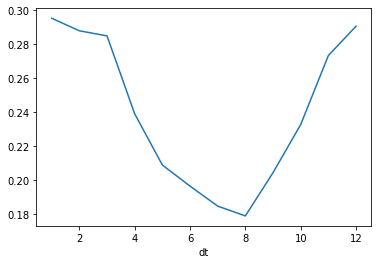

In [47]:
aff.groupby(aff.dt.dt.month).c.mean().plot()

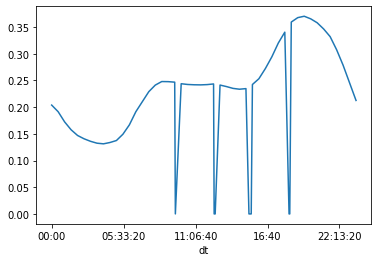

In [48]:
aff.groupby(aff.dt.dt.time).c.mean().plot()

In [54]:
aff_wint = aff[(aff.dt.dt.month <= 3) | (aff.dt.dt.month >= 10)].copy()

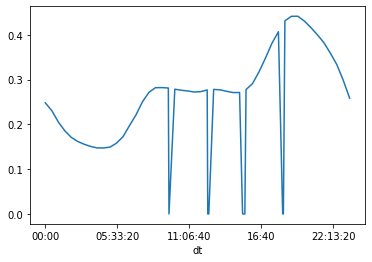

In [56]:
aff_wint.groupby(aff_wint.dt.dt.time).c.mean().plot()

In [57]:
aff_summ = aff[(aff.dt.dt.month >= 7) & (aff.dt.dt.month < 10)].copy()

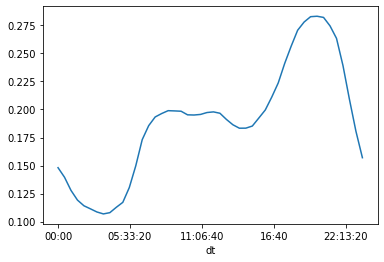

In [59]:
aff_summ.groupby(aff_summ.dt.dt.time).c.mean().plot()

In [121]:
usage = np.random.rand(50, 3, 12, 48)

slots = [
    str(i // 2).zfill(2) + ":" + str(30 if i % 2 else 0).zfill(2)
    for i in range(48)
]

arr = xr.DataArray(
    usage,
    dims=("contract", "dayt", "month", "time"),
    coords={
        "dayt": ["BUS", "SAT", "HOL"],
        "month": list(range(1, 13)),
        "time": slots,
    },
    name="usage"
)

In [128]:
arr.sel(month=1, time=["08:00", "08:30", "09:00", "09:30"]).mean("dayt")

<xarray.DataArray 'usage' (contract: 50, time: 4)>
array([[0.70766666, 0.38667764, 0.27378588, 0.62565691],
       [0.27673154, 0.55184617, 0.49771676, 0.48573871],
       [0.390381  , 0.57959534, 0.61979555, 0.37222707],
       [0.70779621, 0.34909789, 0.33620114, 0.44257752],
       [0.40414249, 0.72032487, 0.68302864, 0.55884067],
       [0.4945976 , 0.58488204, 0.39397607, 0.60149644],
       [0.62790334, 0.61086251, 0.45513143, 0.69224782],
       [0.33755817, 0.32647018, 0.34742072, 0.42032431],
       [0.39618612, 0.66444499, 0.30757189, 0.57275477],
       [0.44287448, 0.59166553, 0.57484619, 0.16583759],
       [0.7073392 , 0.83764685, 0.32749383, 0.59335804],
       [0.47416569, 0.5801027 , 0.54083647, 0.26136275],
       [0.29558347, 0.62750876, 0.94621755, 0.31666121],
       [0.67042842, 0.57442013, 0.32071162, 0.50463878],
       [0.84447029, 0.58140472, 0.47342195, 0.55343056],
       [0.21807902, 0.84451096, 0.47423645, 0.18886932],
       [0.58043032, 0.42169353, 0.58301555, 0.33491677],
       [0.44997689, 0.74678521, 0.73163736, 0.46193478],
       [0.39737578, 0.42115797, 0.24177262, 0.74597886],
       [0.53053061, 0.68744187, 0.44261563, 0.67687257],
       [0.47955848, 0.55242842, 0.45702449, 0.71674085],
       [0.48064361, 0.51547626, 0.39016603, 0.32034704],
       [0.46921466, 0.34169636, 0.5336403 , 0.5831773 ],
       [0.73495935, 0.66032774, 0.47688767, 0.37363409],
       [0.63593574, 0.40781396, 0.76325564, 0.52744289],
       [0.39734004, 0.65934787, 0.21558737, 0.71748162],
       [0.62407467, 0.67528658, 0.41348671, 0.38285668],
       [0.48884393, 0.44910987, 0.4807694 , 0.71629185],
       [0.61224078, 0.53060621, 0.40492061, 0.44060096],
       [0.69291882, 0.19975541, 0.59987339, 0.60770647],
       [0.12455423, 0.24781799, 0.40631254, 0.43565862],
       [0.67307409, 0.33937713, 0.90149613, 0.74370823],
       [0.80028415, 0.55733251, 0.71876211, 0.74567391],
       [0.30106259, 0.34175847, 0.54359014, 0.66507846],
       [0.48087566, 0.77119506, 0.65230998, 0.75895779],
       [0.94199005, 0.80103763, 0.57773976, 0.38453801],
       [0.32499214, 0.79436631, 0.34991767, 0.27075264],
       [0.88487764, 0.70181513, 0.47268657, 0.22029976],
       [0.73923912, 0.49956937, 0.53681478, 0.6284885 ],
       [0.24055979, 0.68536629, 0.69639517, 0.55727072],
       [0.27534223, 0.4535825 , 0.48357552, 0.33886574],
       [0.4998803 , 0.3145899 , 0.49381465, 0.72327979],
       [0.31866259, 0.71521373, 0.48983077, 0.62476495],
       [0.1575486 , 0.20912554, 0.68033316, 0.29098426],
       [0.68235283, 0.20758718, 0.3235465 , 0.39204777],
       [0.25208405, 0.62469551, 0.18297314, 0.500665  ],
       [0.45167601, 0.58786992, 0.38182845, 0.39327832],
       [0.25261788, 0.34448653, 0.47588634, 0.59445317],
       [0.56249973, 0.33215365, 0.46948838, 0.42029491],
       [0.71667747, 0.46344681, 0.73750724, 0.34054106]])
Coordinates:
    month    int64 1
  * time     (time) <U5 '08:00' '08:30' '09:00' '09:30'
Dimensions without coordinates: contract